In [2]:
import time
import numpy as np
import pandas as pd
import shogun as sg
from sklearn.model_selection import train_test_split

def saveInfo(name, my_time, my_acc, my_F1, my_precision, my_recall, timeDict, accDict, F1Dict, precisionDict, recallDict):
	timeDict[name] = my_time
	accDict[name] = my_acc
	F1Dict[name]= my_F1
	precisionDict[name] = my_precision
	recallDict[name] = my_recall
	# print("---{}: {} seconds ---".format (name, my_time))
	# print('{}, {} accuracy score: {}, F1-score: {}'.format(title, name, accuracy_score, my_F1))

def evaluateAndSave(name, train_time, features_test, labels_test, labels_predict, timeDict, accDict, F1Dict, precisionDict, recallDict):
	acc = sg.AccuracyMeasure().evaluate(labels_predict, labels_test)
	f1 = sg.F1Measure().evaluate(labels_predict, labels_test)
	prec = sg.PrecisionMeasure().evaluate(labels_predict, labels_test)
	rec = sg.RecallMeasure().evaluate(labels_predict, labels_test)
	print('Accuracy:', acc)
	print('F1:', f1)
	print('Precision:', prec)
	print('Recall:', rec)
	saveInfo(name, train_time, acc, f1, prec, rec, timeDict, accDict, F1Dict, precisionDict, recallDict)

df = pd.read_csv('./exercise_data/C_elegans_processed.csv', header=0)

In [3]:
train_seq, test_seq, train_label, test_label = train_test_split(df['sequences'], df['labels'], test_size=0.33, random_state=42)

In [4]:
unique, counts = np.unique(train_label, return_counts=True)
dict(zip(unique, counts))

{-1.0: 1335, 1.0: 139}

In [5]:
train_label.shape

(1474,)

In [6]:
# train_df = pd.read_csv(train_data_source, header=0)
# test_df = pd.read_csv(test_data_source, header=0)

# train_seq = train_df['sequences']
# train_label = train_df['labels']
# test_seq = test_df['sequences']
# test_label = test_df['labels']

# train_seq = np.array(train_seq)
# train_label = np.array(train_label)
# test_seq = np.array(test_seq)
# test_label = np.array(test_label)

print('train_seq shape:', train_seq.shape)
print('test_seq shape:', test_seq.shape)

timeDict = {}
accDict = {}
F1Dict = {}
precisionDict = {}
recallDict = {}

features_train = sg.StringCharFeatures(train_seq.tolist(), sg.DNA)
features_test = sg.StringCharFeatures(test_seq.tolist(), sg.DNA)
labels_train = sg.BinaryLabels(np.array(train_label))
labels_test = sg.BinaryLabels(np.array(test_label))

# SVM
C = 1.0
epsilon = 0.001

train_seq shape: (1474,)
test_seq shape: (726,)


In [55]:
features_test.get_max_vector_length()

82

In [7]:
svm = sg.LibSVM(C, sg.WeightedDegreeStringKernel(features_train, features_train, 5), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("WeightedDegreeStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.9724517906336089
F1: 0.8113207547169812
Precision: 0.9555555555555556
Recall: 0.7049180327868853


In [8]:
svm = sg.LibSVM(C, sg.WeightedDegreePositionStringKernel(features_train, features_train, 20), labels_train)
svm.set_epsilon(epsilon)
svm.set_batch_computation_enabled(True)
start = time.time()
svm.train()
evaluateAndSave("WeightedDegreePositionStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.9683195592286501
F1: 0.7766990291262136
Precision: 0.9523809523809523
Recall: 0.6557377049180327


In [42]:
svm = sg.LibSVM(C, sg.PolyMatchStringKernel(features_train, features_train, 5, True), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("PolyMatchStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.9159779614325069
F1: 0.0
Precision: nan
Recall: 0.0


In [43]:
svm = sg.LibSVM(C, sg.FixedDegreeStringKernel(features_train, features_train, 5), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("FixedDegreeStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.953168044077135
F1: 0.6530612244897959
Precision: 0.8648648648648649
Recall: 0.5245901639344263


In [44]:
svm = sg.LibSVM(C, sg.LinearStringKernel(features_train, features_train), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("LinearStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.8650137741046832
F1: 0.0392156862745098
Precision: 0.04878048780487805
Recall: 0.03278688524590164


In [45]:
svm = sg.LibSVM(C, sg.LocalAlignmentStringKernel(features_train, features_train), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("LocalAlignmentStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.9159779614325069
F1: 0.0
Precision: nan
Recall: 0.0


In [46]:
svm = sg.LibSVM(C, sg.LocalityImprovedStringKernel(features_train, features_train, 10, 5, 5), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("LocalityImprovedStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.9159779614325069
F1: 0.0
Precision: nan
Recall: 0.0


In [47]:
svm = sg.LibSVM(C, sg.GaussianMatchStringKernel(features_train, features_train, 5), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("GaussianMatchStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.9159779614325069
F1: 0.0
Precision: nan
Recall: 0.0


In [48]:
svm = sg.LibSVM(C, sg.CommUlongStringKernel(features_train, features_train), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("CommUlongStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

NotImplementedError: Wrong number or type of arguments for overloaded function 'new_CommUlongStringKernel'.
  Possible C/C++ prototypes are:
    shogun::CCommUlongStringKernel::CCommUlongStringKernel(int32_t,bool)
    shogun::CCommUlongStringKernel::CCommUlongStringKernel(int32_t)
    shogun::CCommUlongStringKernel::CCommUlongStringKernel()
    shogun::CCommUlongStringKernel::CCommUlongStringKernel(shogun::CStringFeatures< uint64_t > *,shogun::CStringFeatures< uint64_t > *,bool,int32_t)
    shogun::CCommUlongStringKernel::CCommUlongStringKernel(shogun::CStringFeatures< uint64_t > *,shogun::CStringFeatures< uint64_t > *,bool)
    shogun::CCommUlongStringKernel::CCommUlongStringKernel(shogun::CStringFeatures< uint64_t > *,shogun::CStringFeatures< uint64_t > *)


In [49]:
svm = sg.LibSVM(C, sg.CommWordStringKernel(features_train, features_train, False, 10), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("CommWordStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

NotImplementedError: Wrong number or type of arguments for overloaded function 'new_CommWordStringKernel'.
  Possible C/C++ prototypes are:
    shogun::CCommWordStringKernel::CCommWordStringKernel()
    shogun::CCommWordStringKernel::CCommWordStringKernel(int32_t,bool)
    shogun::CCommWordStringKernel::CCommWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *,bool,int32_t)
    shogun::CCommWordStringKernel::CCommWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *,bool)
    shogun::CCommWordStringKernel::CCommWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *)


In [50]:
svm = sg.LibSVM(C, sg.MatchWordStringKernel(features_train, features_train, 5), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("MatchWordStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

NotImplementedError: Wrong number or type of arguments for overloaded function 'new_MatchWordStringKernel'.
  Possible C/C++ prototypes are:
    shogun::CMatchWordStringKernel::CMatchWordStringKernel()
    shogun::CMatchWordStringKernel::CMatchWordStringKernel(int32_t,int32_t)
    shogun::CMatchWordStringKernel::CMatchWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *,int32_t)


In [51]:
svm = sg.LibSVM(C, sg.SimpleLocalityImprovedStringKernel(features_train, features_train, 10, 5, 5), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("SimpleLocalityImprovedStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.9159779614325069
F1: 0.0
Precision: nan
Recall: 0.0


In [52]:
svm = sg.LibSVM(C, sg.SNPStringKernel(features_train, features_train, 5, 10, True), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("SNPStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

SystemError: [1;31m[ERROR][0m In file /feedstock_root/build_artefacts/shogun-cpp_1512688880429/work/shogun-shogun_6.1.3/src/shogun/kernel/string/SNPStringKernel.cpp line 133: alen (82) !=m_str_len (0)


In [53]:
svm = sg.LibSVM(C, sg.WeightedCommWordStringKernel(features_train, features_train), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("WeightedCommWordStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

NotImplementedError: Wrong number or type of arguments for overloaded function 'new_WeightedCommWordStringKernel'.
  Possible C/C++ prototypes are:
    shogun::CWeightedCommWordStringKernel::CWeightedCommWordStringKernel()
    shogun::CWeightedCommWordStringKernel::CWeightedCommWordStringKernel(int32_t,bool)
    shogun::CWeightedCommWordStringKernel::CWeightedCommWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *,bool,int32_t)
    shogun::CWeightedCommWordStringKernel::CWeightedCommWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *,bool)
    shogun::CWeightedCommWordStringKernel::CWeightedCommWordStringKernel(shogun::CStringFeatures< uint16_t > *,shogun::CStringFeatures< uint16_t > *)


In [54]:
svm = sg.LibSVM(C, sg.SparseSpatialSampleStringKernel(features_train, features_train), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("SparseSpatialSampleStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

SystemError: [1;31m[ERROR][0m In file /feedstock_root/build_artefacts/shogun-cpp_1512688880429/work/shogun-shogun_6.1.3/src/shogun/kernel/string/SparseSpatialSampleStringKernel.cpp line 377: t out of range - shouldn't happen


In [55]:
svm = sg.LibSVM(C, sg.OligoStringKernel(features_train, features_train, 10, 8), labels_train)
svm.set_epsilon(epsilon)
start = time.time()
svm.train()
evaluateAndSave("OligoStringKernel", time.time()-start, 
				features_test, labels_test, svm.apply_binary(features_test),
				timeDict, accDict, F1Dict, precisionDict, recallDict)

Accuracy: 0.9159779614325069
F1: 0.0
Precision: nan
Recall: 0.0


In [57]:
F1Dict

{'WeightedDegreeStringKernel': 0.8113207547169812,
 'WeightedDegreePositionStringKernel': 0.7766990291262136,
 'PolyMatchStringKernel': 0.0,
 'FixedDegreeStringKernel': 0.6530612244897959,
 'LinearStringKernel': 0.0392156862745098,
 'LocalAlignmentStringKernel': 0.0,
 'LocalityImprovedStringKernel': 0.0,
 'GaussianMatchStringKernel': 0.0,
 'SimpleLocalityImprovedStringKernel': 0.0,
 'OligoStringKernel': 0.0}

In [ ]:
labels_predict.scores_to_probabilities()
labels_values = labels_predict.get_values()

In [58]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

print("..... PR Curve ......")
precision, recall, _ = precision_recall_curve(test_label, labels_values)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

..... PR Curve ......


NameError: name 'labels_values' is not defined

In [33]:
# Cs=[x for x in np.linspace(0.001,10,1)]
Cs=np.linspace(0.001,10,20)
degrees=[1,2,3,4,5,6,7,8,9,10]

print("degrees", degrees)
print("Cs", Cs)

results = np.zeros((len(degrees), len(Cs)))

for i in range(len(degrees)):
    print("degree", degrees[i])
    degree = degrees[i]
    
    for j in range(len(Cs)):
        print("C", Cs[j])
        svm = sg.LibSVM(Cs[j], sg.WeightedDegreeStringKernel(features_train, features_train, degree), labels_train)
        svm.set_epsilon(epsilon)
        start = time.time()
        svm.train()
        f1 = sg.F1Measure().evaluate(svm.apply_binary(features_test), labels_test)
        results[i,j]=f1

degrees [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Cs [1.00000000e-03 5.27263158e-01 1.05352632e+00 1.57978947e+00
 2.10605263e+00 2.63231579e+00 3.15857895e+00 3.68484211e+00
 4.21110526e+00 4.73736842e+00 5.26363158e+00 5.78989474e+00
 6.31615789e+00 6.84242105e+00 7.36868421e+00 7.89494737e+00
 8.42121053e+00 8.94747368e+00 9.47373684e+00 1.00000000e+01]
degree 1
C 0.001
C 0.5272631578947369
C 1.0535263157894736
C 1.5797894736842104
C 2.1060526315789474
C 2.6323157894736844
C 3.158578947368421
C 3.684842105263158
C 4.211105263157895
C 4.737368421052632
C 5.263631578947369
C 5.789894736842106
C 6.316157894736842
C 6.84242105263158
C 7.368684210526316
C 7.894947368421054
C 8.42121052631579
C 8.947473684210527
C 9.473736842105263
C 10.0
degree 2
C 0.001
C 0.5272631578947369
C 1.0535263157894736
C 1.5797894736842104
C 2.1060526315789474
C 2.6323157894736844
C 3.158578947368421
C 3.684842105263158
C 4.211105263157895
C 4.737368421052632
C 5.263631578947369
C 5.789894736842106
C 6.316157894736842
C 

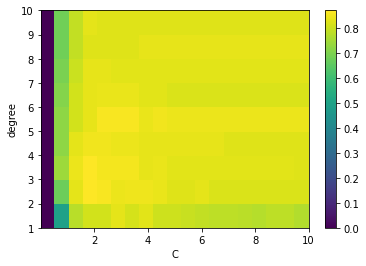

In [35]:
import matplotlib.pyplot as plt
plt.pcolor(np.asarray(Cs), np.asarray(degrees), results)
plt.xlabel("C")
plt.ylabel("degree")
_=plt.colorbar()

In [37]:
# Cs=[x for x in np.linspace(0.001,10,1)]
Cs=np.linspace(0.001,10,20)
degrees=[1,2,3,4,5,6,7,8,9,10]

print("degrees", degrees)
print("Cs", Cs)

results = np.zeros((len(degrees), len(Cs)))

for i in range(len(degrees)):
    print("degree", degrees[i])
    degree = degrees[i]
    
    for j in range(len(Cs)):
        print("C", Cs[j])
        svm = sg.LibSVM(Cs[j], sg.FixedDegreeStringKernel(features_train, features_train, degree), labels_train)
        svm.set_epsilon(epsilon)
        start = time.time()
        svm.train()
        f1 = sg.F1Measure().evaluate(svm.apply_binary(features_test), labels_test)
        results[i,j]=f1

degrees [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Cs [1.00000000e-03 5.27263158e-01 1.05352632e+00 1.57978947e+00
 2.10605263e+00 2.63231579e+00 3.15857895e+00 3.68484211e+00
 4.21110526e+00 4.73736842e+00 5.26363158e+00 5.78989474e+00
 6.31615789e+00 6.84242105e+00 7.36868421e+00 7.89494737e+00
 8.42121053e+00 8.94747368e+00 9.47373684e+00 1.00000000e+01]
degree 1
C 0.001
C 0.5272631578947369
C 1.0535263157894736
C 1.5797894736842104
C 2.1060526315789474
C 2.6323157894736844
C 3.158578947368421
C 3.684842105263158
C 4.211105263157895
C 4.737368421052632
C 5.263631578947369
C 5.789894736842106
C 6.316157894736842
C 6.84242105263158
C 7.368684210526316
C 7.894947368421054
C 8.42121052631579
C 8.947473684210527
C 9.473736842105263
C 10.0
degree 2
C 0.001
C 0.5272631578947369
C 1.0535263157894736
C 1.5797894736842104
C 2.1060526315789474
C 2.6323157894736844
C 3.158578947368421
C 3.684842105263158
C 4.211105263157895
C 4.737368421052632
C 5.263631578947369
C 5.789894736842106
C 6.316157894736842
C 

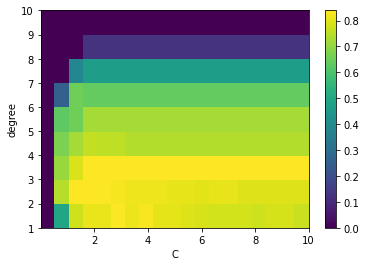

In [38]:
import matplotlib.pyplot as plt
plt.pcolor(np.asarray(Cs), np.asarray(degrees), results)
plt.xlabel("C")
plt.ylabel("degree")
_=plt.colorbar()

In [48]:
# Cs=[x for x in np.linspace(0.001,10,1)]
Cs=np.linspace(0.001,10,20)
degrees=[1,2,3,4,5,6,7,8,9,10]

print("degrees", degrees)
print("Cs", Cs)

results = np.zeros((len(degrees), len(Cs)))

for i in range(len(degrees)):
    print("degree", degrees[i])
    degree = degrees[i]
    
    for j in range(len(Cs)):
        print("C", Cs[j])
        svm = sg.LibSVM(Cs[j], sg.WeightedDegreePositionStringKernel(features_train, features_train, degree), labels_train)
        svm.set_epsilon(epsilon)
        start = time.time()
        svm.train()
        f1 = sg.F1Measure().evaluate(svm.apply_binary(features_test), labels_test)
        results[i,j]=f1

degrees [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Cs [1.00000000e-03 5.27263158e-01 1.05352632e+00 1.57978947e+00
 2.10605263e+00 2.63231579e+00 3.15857895e+00 3.68484211e+00
 4.21110526e+00 4.73736842e+00 5.26363158e+00 5.78989474e+00
 6.31615789e+00 6.84242105e+00 7.36868421e+00 7.89494737e+00
 8.42121053e+00 8.94747368e+00 9.47373684e+00 1.00000000e+01]
degree 1
C 0.001
C 0.5272631578947369
C 1.0535263157894736
C 1.5797894736842104
C 2.1060526315789474
C 2.6323157894736844
C 3.158578947368421
C 3.684842105263158
C 4.211105263157895
C 4.737368421052632
C 5.263631578947369
C 5.789894736842106
C 6.316157894736842
C 6.84242105263158
C 7.368684210526316
C 7.894947368421054
C 8.42121052631579
C 8.947473684210527
C 9.473736842105263
C 10.0
degree 2
C 0.001
C 0.5272631578947369
C 1.0535263157894736
C 1.5797894736842104
C 2.1060526315789474
C 2.6323157894736844
C 3.158578947368421
C 3.684842105263158
C 4.211105263157895
C 4.737368421052632
C 5.263631578947369
C 5.789894736842106
C 6.316157894736842
C 

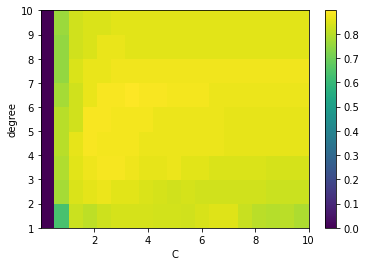

In [49]:
import matplotlib.pyplot as plt
plt.pcolor(np.asarray(Cs), np.asarray(degrees), results)
plt.xlabel("C")
plt.ylabel("degree")
_=plt.colorbar()